<a href="https://colab.research.google.com/github/majidberahman/Monte-Carlo-Simulation-in-python/blob/main/dental_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
pip install seaborn


In [43]:
pip install tensorflow opencv-python matplotlib seaborn scikit-learn seaborn


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.3769 - loss: 0.8392 - val_accuracy: 0.7143 - val_loss: 0.5933
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.7186 - loss: 0.5832 - val_accuracy: 0.7143 - val_loss: 0.5704
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.7381 - loss: 0.5417 - val_accuracy: 0.7143 - val_loss: 0.5420
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 430ms/step - accuracy: 0.7264 - loss: 0.5189 - val_accuracy: 0.7143 - val_loss: 0.5136
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.7381 - loss: 0.4820 - val_accuracy: 0.7143 - val_loss: 0.4754
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.7266 - loss: 0.4580 - val_accuracy: 0.7619 - val_loss: 0.4382
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.7738 - loss: 0.3958 - val_accuracy: 0.7143 - val_loss: 0.4106
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.8761 - loss: 0.3416 - val_accuracy: 0.7143 - val_loss:

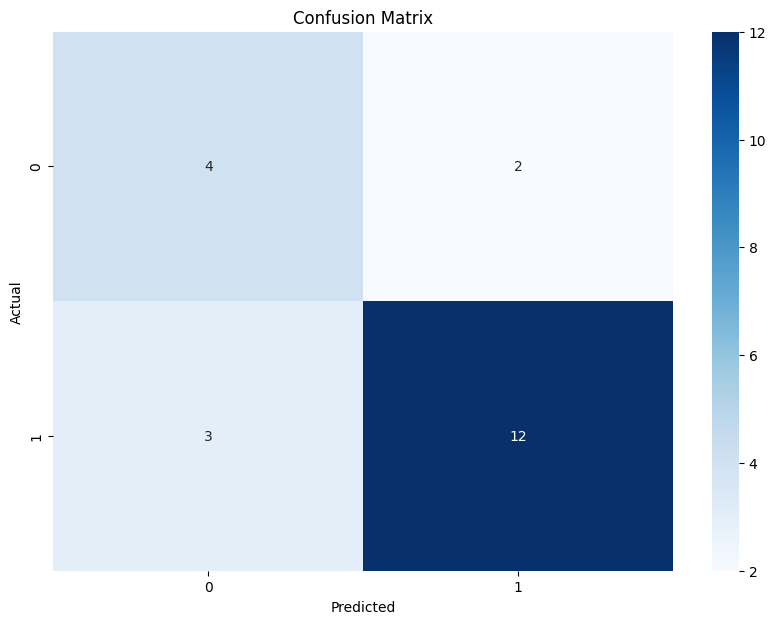

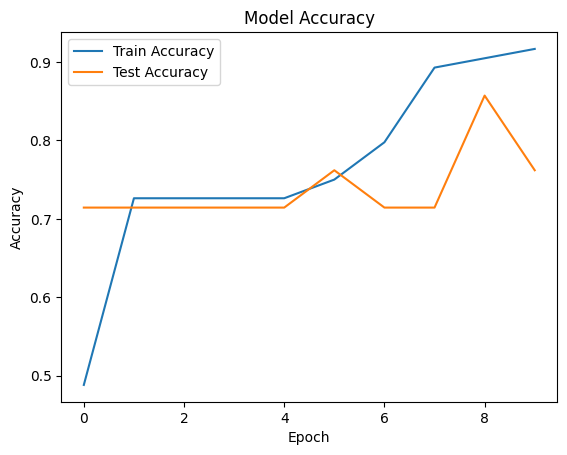

In [53]:
# اتصال به Google Drive
from google.colab import drive
drive.mount('/content/drive')

# کتابخانه‌های مورد نیاز
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from pathlib import Path

# تنظیم مسیر به دایرکتوری تصاویر
data_dir = Path('/content/drive/MyDrive/images')

# بارگذاری و پیش‌پردازش تصاویر
def load_images(data_dir):
    images = []
    labels = []
    classes = [p.name for p in data_dir.iterdir() if p.is_dir()]
    for label in classes:
        class_dir = data_dir / label
        for img_path in class_dir.glob('*.bmp'):  # فقط فایل‌های BMP را بارگذاری کنید
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"تصویر '{img_path}' بارگذاری نشد.")
                continue
            img = cv2.resize(img, (64, 64))  # اندازه‌گذاری تصویر
            images.append(img)
            labels.append(classes.index(label))
    return np.array(images), np.array(labels)

# بارگذاری تصاویر و برچسب‌ها
X, y = load_images(data_dir)

# تقسیم داده‌ها به مجموعه‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نرمال‌سازی داده‌ها
X_train = X_train / 255.0
X_test = X_test / 255.0

# ایجاد مدل CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # تعداد کلاس‌ها
])

# کامپایل مدل
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# ارزیابی مدل
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# پیش‌بینی و ارزیابی
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# نمایش گزارش کلاس‌ها
print(classification_report(y_test, y_pred_classes))

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
plt.title('Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# نمایش دقت و خطا
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
